# **Seaborn with Matplotlib (4)**

## **4. seaborn `figure-level` 다듬기**

+ seaborn + matplotlib 마지막 시간입니다.
+ `figure-level` 그림을 그리고 다듬어 봅니다.
+ 자체적으로 지원하는 명령어를 사용해보고
+ 개흉 심장마사지 방법을 알아보겠습니다.

> [seaborn API](https://seaborn.pydata.org/api.html)  
> [seaborn tutorial](https://seaborn.pydata.org/tutorial.html)  
> [seaborn with matplotlib](https://jehyunlee.github.io/2020/10/06/Python-DS-36-seaborn_matplotlib3/)

## **4.1 `figure-level`으로 편리하게 그리기 : `pairplot()`**

> [wikipedia: Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)  
> [wikipedia: Anscombe’s quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)  
> [autodesk: datasaurus](https://www.autodesk.com/research/publications/same-stats-different-graphs)  
> [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)

+ [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)에서 피할 수 없는 과정이 상관도입니다.
    + 두 변수 사이의 관계를 그려 관계를 파악합니다.
    + 대개 산점도 `scatter plot`나 밀도 함수 `density plot`를 쓰고
    + 추세선 `regression`을 덧붙이는 경우도 있습니다.

+ 데이터 분포는 통계값으로만 확인하면 안됩니다.
    + **평균과 표준편차는 같은데 분포는 다른 경우**가 많습니다.
    + **반드시 분포를 그려 봐야**합니다.
    + [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)이 아주 좋은 예시입니다.

![](https://user-images.githubusercontent.com/72365693/106899537-d25be780-6738-11eb-8a63-680d9f2d7ecf.PNG)

+ N개의 인자 사이에는 \frac{N(N-1)}{2}가지 관계가 있습니다.
+ seaborn의 `pairplot()`은 여러 인자 사이의 수많은 상관도를 쉽게 그려줍니다.

+ 붓꽃 `iris` 데이터셋으로 상관도를 그려봅니다.
    + 꽃받침 `sepal`과 꽃잎 `peta`,
    + 길이 `length`와 폭 `width` 네 가지 인자로부터
    + 여섯 가지의 상관도,
    + 네 가지의 히스토그램이 나옵니다.

+ 코드 한 줄로 그려봅시다.

In [1]:
import matplotlib.pyplot as plt

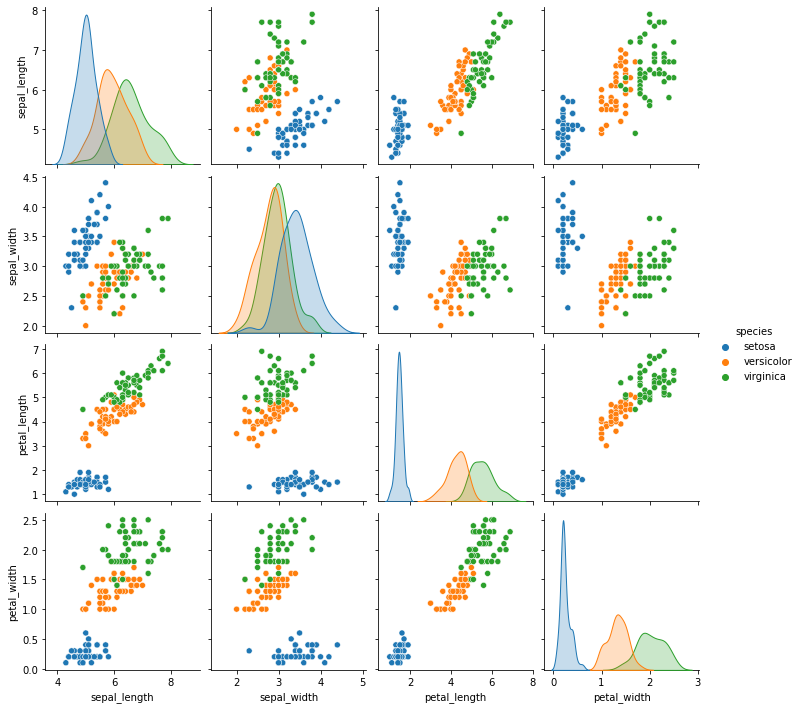

In [2]:
import seaborn as sns

iris = sns.load_dataset("iris")

g = sns.pairplot(iris, hue = "species")

+ 종 `species`별 분포를 그려봅니다.

+ `hue=`라는 인자 하나만 추가했을 뿐입니다.
    + 그림이 갑자기 예뻐졌습니다.
    + 히스토그램도 밀도함수로 바뀌어서 훨씬 보기 좋습니다.

+ 여기에 다른 그림을 겹쳐보겠습니다.
    + **대각선 위** : 2차원 밀도함수 + 추세선
    + **대각선 아래** : 2차원 밀도함수 + 산포도

+ seaborn `figurre-level` 기능만으로 가능합니다.
+ `map_lower()`와 `map_upper`를 사용합니다.

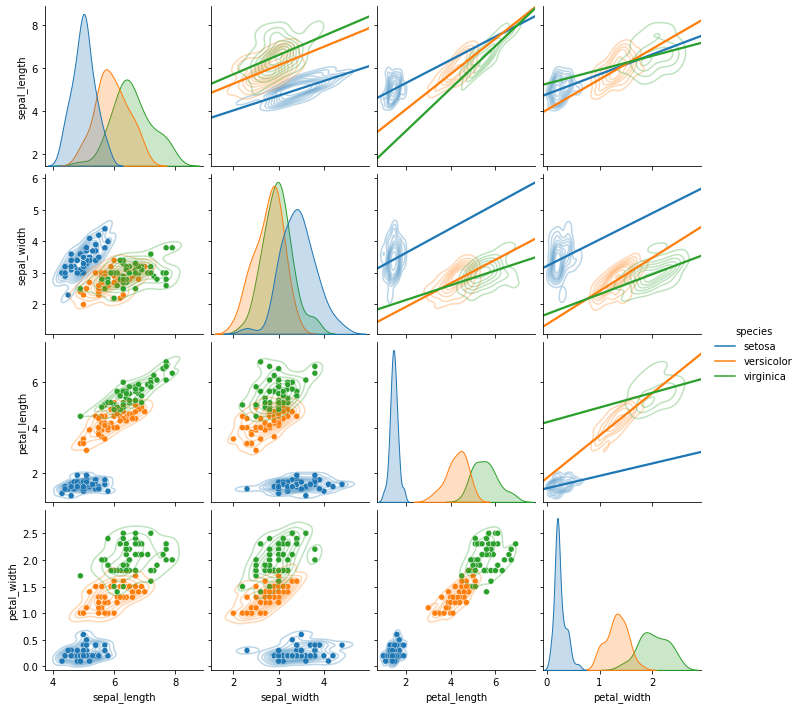

In [3]:
g = sns.pairplot(iris, hue="species", kind="kde", plot_kws={"alpha":0.3})
g.map_lower(sns.scatterplot)
g.map_upper(sns.regplot, scatter=False, truncate=False, ci=False)

+ `map_lower()`와 `map_upper()`는 대각선의 위와 아래에 **그림을 덧씌우는 `map`함수**입니다.
    + 앞서 완성한 pairplot에 새로운 그림을 덧붙입니다.
    + 인자로는 **함수 이름**과 **이 함수의 옵션들**을 연달아 넣어 줍니다.
    + 함수에 맞는 인자를 넣어줘야 합니다.

## **4.2 `figure-level`그림 뼈대부터 세우기 : `PairGrid()`**

> [seaborn.PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)

+ pairplot을 단계별로 그리는 방법입니다.
    + 코드 양은 `pairplot()`한 줄보다 늘어납니다.
    + 그러나 자윧가 늘어납니다.

+ `.pairplot()`으로는 위 아래를 완전히 다르게 할 수 없습니다.
+ 대각선의 아래엔 산점도와 추세선을 그리고
+ 대각선 위에는 밀도함수만 그려보겠습니다.

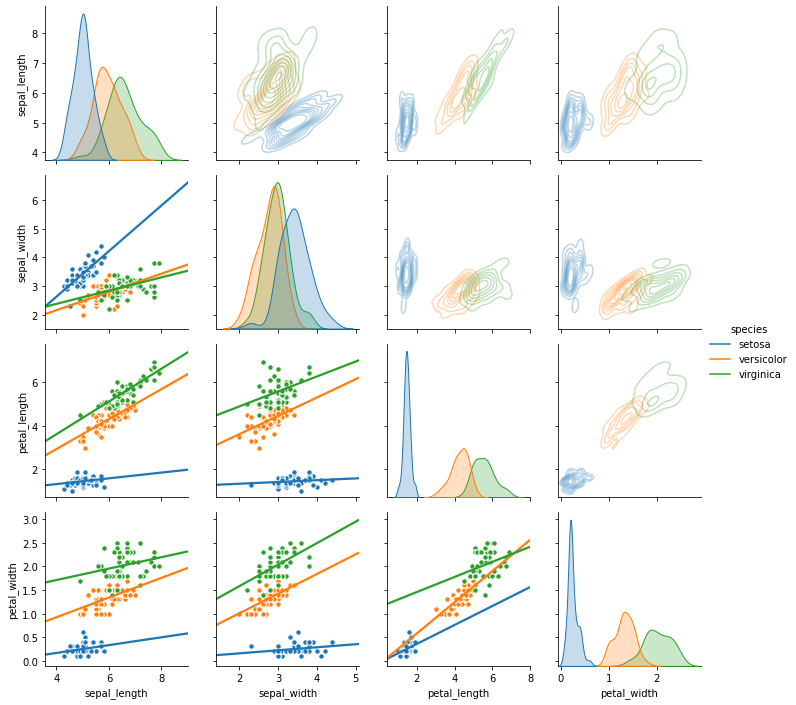

In [4]:
# 틀 만들기
g = sns.PairGrid(iris, hue="species", diag_sharey=False)

# diagonal
g.map_diag(sns.kdeplot, fill=True)

# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)

# upper
g.map_upper(sns.kdeplot, alpha=0.3)

# legend
g.add_legend()

+ `.pairplot()`과 같은 형식의 그림이 나왔습니다.
+ 내 의도를 더 잘 반영할 수 있게 되었습니다.
+ 8번째 줄에는 `plt.scatter`가 들어가 있습니다.
+ `.pairplot()`도 마찬가지지만 `.map()`에는 seaborn대신 matplotlib 함수를 사용할 수 있습니다.

+ 중복되는 오른쪽 윗부분을 생략할 수 있습니다.
    * `corner=True`를 넣어줍니다.

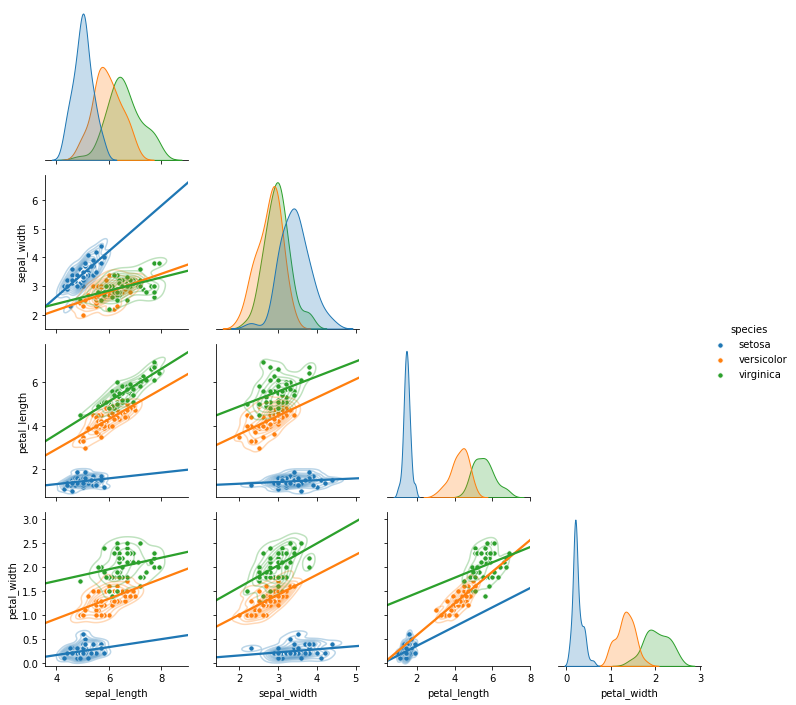

In [5]:
g = sns.PairGrid(iris, hue="species", diag_sharey=False, corner=True)
# corner : 모서리 부분 생략
# diag : 대각행렬

# diagonal
g.map_diag(sns.kdeplot, fill=True)

# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)

# legend
g.add_legend()

+ 이제 작은 수정을 해봅니다.
    1. 대각선에 **사각 테두리** 치기
    2. **범례를 그림 안으로** 가져오기

+ 가슴을 열고 심장마사지를 할 시간입니다.

## **4.3 `figure-level` 그림 객체 접근**

> [seaborn.FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid)  
> [matplotlib.figure.Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html)  
> [matplotlib.aexs.Axxes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)

+ matplotlib 그림은 [figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html)와 [axes](https://matplotlib.org/3.3.2/api/axes_api.html)로 나뉩니다.
    + seaborn 그림도 결국 matplotlib 그림입니다.
    + **seaborn의 figure와 axes**에 접근하면 됩니다.

### **4.3.1 axes : `.axes`**

+ [이전 글](https://jehyunlee.github.io/2020/10/03/Python-DS-35-seaborn_matplotlib2/)에서 `axes`를 이용해 jointplot을 재현했습니다.
+ axes 객체는 `.axes`를 이용해 접근 가능합니다.

In [6]:
g.axes

array([[<AxesSubplot:>, None, None, None],
       [<AxesSubplot:ylabel='sepal_width'>, <AxesSubplot:>, None, None],
       [<AxesSubplot:ylabel='petal_length'>, <AxesSubplot:>,
        <AxesSubplot:>, None],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width'>]], dtype=object)

+ 확인 결과 `AxeSubplot`의 array입니다.

#### **4.3.1.1 특정 axes 윤곽선 그리기**

> [Seaborn with Matplotlib(2)](https://jehyunlee.github.io/2020/10/03/Python-DS-35-seaborn_matplotlib2/)  
> [Spines & Grids](https://jehyunlee.github.io/2020/08/27/Python-DS-28-mpl_spines_grids/)

+ 정체를 알았으니 `axes[i][j]`로 접근할 수 있습니다.
+ `g.axes[i][j]`의 spine을 보이게 합니다.

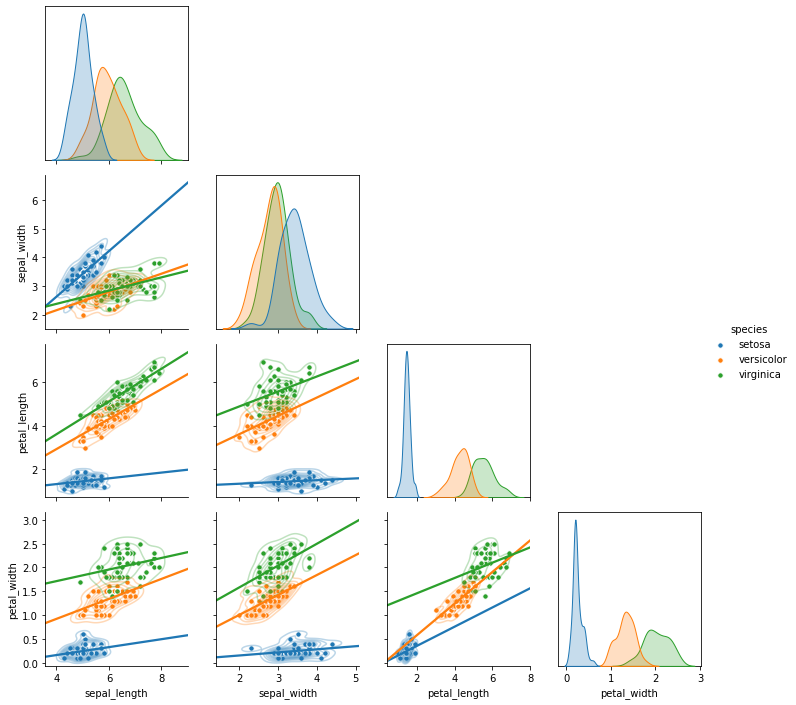

In [7]:
g = sns.PairGrid(iris, hue="species", diag_sharey=False, corner=True)

# diagonal
g.map_diag(sns.kdeplot, fill=True)
for i in range(4):
    g.axes[i][i].spines["left"].set_visible(True)
    g.axes[i][i].spines["top"].set_visible(True)
    g.axes[i][i].spines["right"].set_visible(True)
    
# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)

# legend
g.add_legend()

#### **4.3.1.2 범례 조정**

> seaborn axisgrid.py 소스코드  
> matplotlib.axes.Axes.get_legend_handle_labels  
> matplotlib.axes.Axes.legend

+ legend 정보를 가져와서 legend로 삽입합니다.
    + 대게 legend에 필요한 handels와 labels는 `.get_legend_handles_labels()`로 가져옵니다.
    + 하지만 seaborn `figure-level` 그림엔 이 명령이 통하지 않습니다.
    + private처럼 보이는 **`._legend_data`**를 사용합니다.
    * **공식 문서에 없습니다. 소스 코드를 뒤적여야 합니다.**

+ `._legend_data` 정체를 확인합니다.
+ 범례가 `dict` 형식으로 들어 있습니다.

In [8]:
g._legend_data

{'setosa': <matplotlib.collections.PathCollection at 0x230e9de5b50>,
 'versicolor': <matplotlib.collections.PathCollection at 0x230e9dbe910>,
 'virginica': <matplotlib.collections.PathCollection at 0x230e9de54c0>}

+ 아래 코드를 추가하여 범례를 이동합니다.

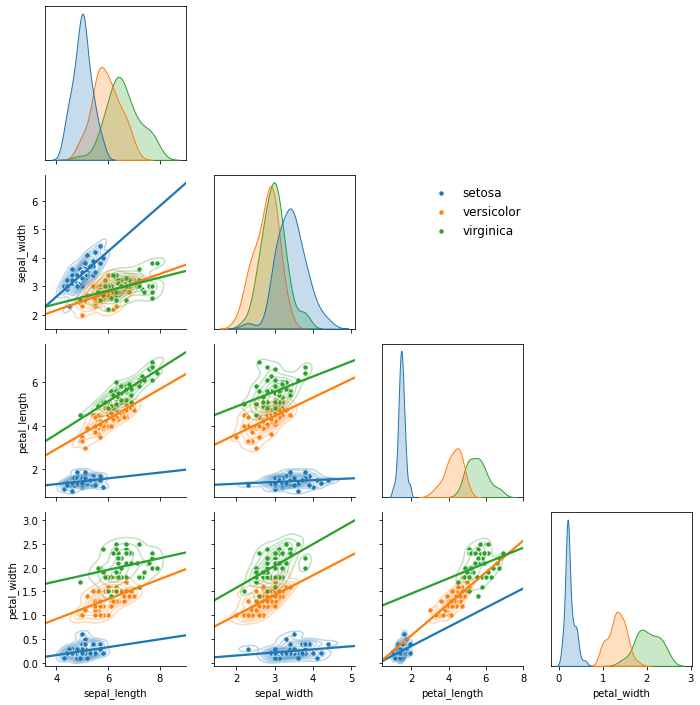

In [12]:
g = sns.PairGrid(iris, hue="species", diag_sharey=False, corner=True)

# diagonal
g.map_diag(sns.kdeplot, fill=True)
for i in range(4):
    g.axes[i][i].spines["left"].set_visible(True)
    g.axes[i][i].spines["top"].set_visible(True)
    g.axes[i][i].spines["right"].set_visible(True)
    
# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)

handles = g._legend_data.values()
labels = g._legend_data.keys()

# axes[1][0] 기준으로 오른쪽 멀리 범례 삽입
g.axes[1][0].legend(handles=handles, labels=labels,
                    bbox_to_anchor=(3.45, 1),
                    fontsize="large", frameon=False
                   )

+ 이런 방식으로 특정 axes만 제어할 수 있습니다.
    + **원하는 그림, 글자**을 넣을 수 있고
    + **특정 데이터의 색상**을 변경할 수 있습니다.

### **4.3.2 figure: `.fig`**

+ 개별 공간은 axes로 제어하지만
+ 여러 axes가 연관된 공간은 figure로 제어합니다,
+ figure객체는 `.fig`를 이용해 접근 가능합니다.

In [13]:
type(g.fig)

matplotlib.figure.Figure

+ `type()`으로 감싸주지 않으면 그림이 통으로 출력됩니다.

#### **4.3.2.1 ylabel alignment**

> [matplotlib.figure.Figure #align_ylabels](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.figure.Figure.html?highlight=align_ylabels#matplotlib.figure.Figure.align_ylabels)  
> [matplotlib Align y-labels](https://matplotlib.org/3.3.1/gallery/pyplots/align_ylabels.html)

+ 위 그림에서 ylabel 줄이 맞지 않습니다.
    + 맨 왼쪽 아래 axes[3][0]의 label이 비죽 나왔네요.
    + 다른 ylabel을 움직여서 열을 맞춰 봅시다.

+ 위 그림 코드의 맨 마지막 줄에 한 줄만 추가합니다.

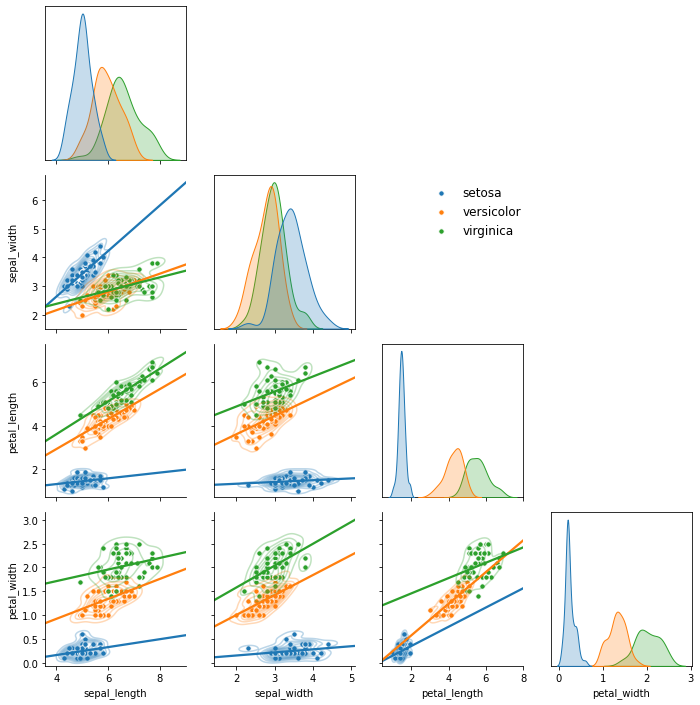

In [18]:
g = sns.PairGrid(iris, hue="species", diag_sharey=False, corner=True)

# diagonal
g.map_diag(sns.kdeplot, fill=True)
for i in range(4):
    g.axes[i][i].spines["left"].set_visible(True)
    g.axes[i][i].spines["top"].set_visible(True)
    g.axes[i][i].spines["right"].set_visible(True)
    
# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)



handles = g._legend_data.values()
labels = g._legend_data.keys()

# axes[1][0] 기준으로 오른쪽 멀리 범례 삽입
g.axes[1][0].legend(handles=handles, labels=labels,
                    bbox_to_anchor=(3.45, 1),
                    fontsize="large", frameon=False
                   )

g.fig.align_ylabels(g.axes[:,0])

#### **4.3.2.2 범례 조정**

> [matplotlib.figure.Figure #legend](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.figure.Figure.html?highlight=legend#matplotlib.figure.Figure.legend)

+ 범례는 figure 기준으로도 삽입 가능합니다.
+ 아래 코드는 위의 `axes[1][0].legend()`와 동일합니다.
+ 전체적인 그림의 위치를 잡을 수 있어 더 좋습니다.

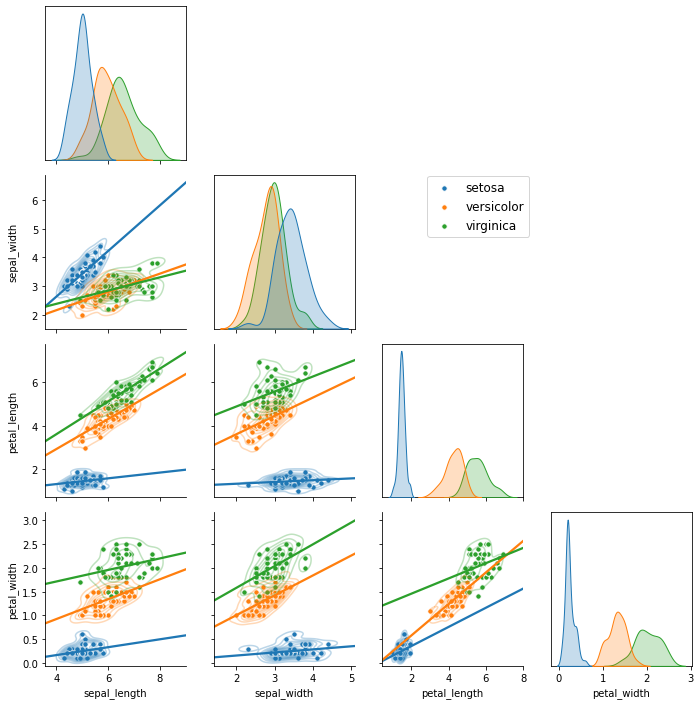

In [22]:
g = sns.PairGrid(iris, hue="species", diag_sharey=False, corner=True)

# diagonal
g.map_diag(sns.kdeplot, fill=True)
for i in range(4):
    g.axes[i][i].spines["left"].set_visible(True)
    g.axes[i][i].spines["top"].set_visible(True)
    g.axes[i][i].spines["right"].set_visible(True)
    
# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)



handles = g._legend_data.values()
labels = g._legend_data.keys()



g.fig.align_ylabels(g.axes[:,0])

g.fig.legend(handles=handles, labels=labels,
             bbox_to_anchor=(0.75, 0.75), # 범례박스 위치
             fontsize="large")

#### **4.3.2.3 suptitle**

> [matplotlib.figure.Figure #suptitle](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.figure.Figure.html?highlight=suptitle#matplotlib.figure.Figure.suptitle)

+ 그림 전체에 제목을 붙일 수 있습니다.

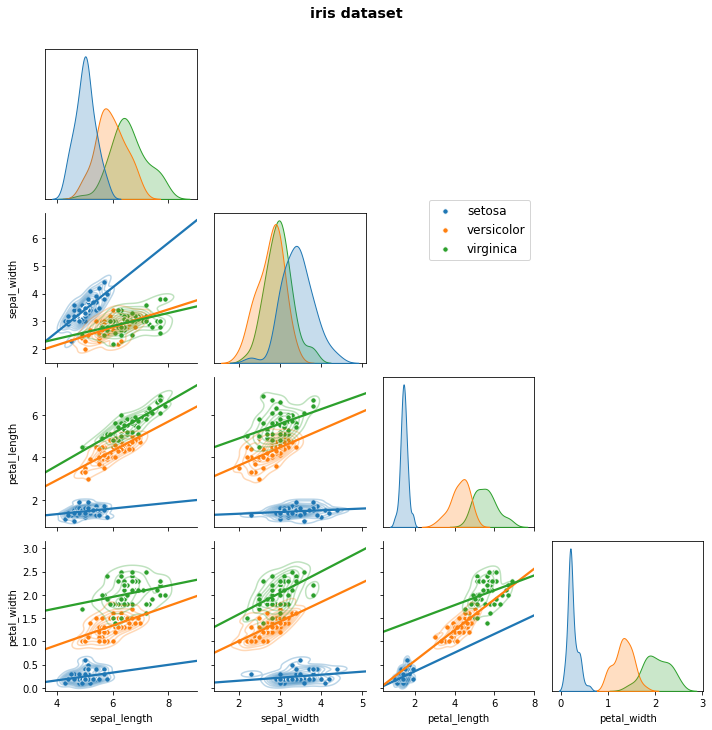

In [23]:
g = sns.PairGrid(iris, hue="species", diag_sharey=False, corner=True)

# diagonal
g.map_diag(sns.kdeplot, fill=True)
for i in range(4):
    g.axes[i][i].spines["left"].set_visible(True)
    g.axes[i][i].spines["top"].set_visible(True)
    g.axes[i][i].spines["right"].set_visible(True)
    
# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)



handles = g._legend_data.values()
labels = g._legend_data.keys()



g.fig.align_ylabels(g.axes[:,0])

g.fig.legend(handles=handles, labels=labels,
             bbox_to_anchor=(0.75, 0.75), # 범례박스 위치
             fontsize="large")

g.fig.suptitle("iris dataset", y=1.01,     # 배경 제목
               weight="bold", fontsize="x-large"
              )
g.fig.tight_layout()

#### **4.3.2.4 facecolor, edgeolor**

> [matplotlib.figure.Figure #set_facecolor](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.figure.Figure.html?highlight=set_facecolor#matplotlib.figure.Figure.set_facecolor)

+ 그림 바탕색을 칠합니다.

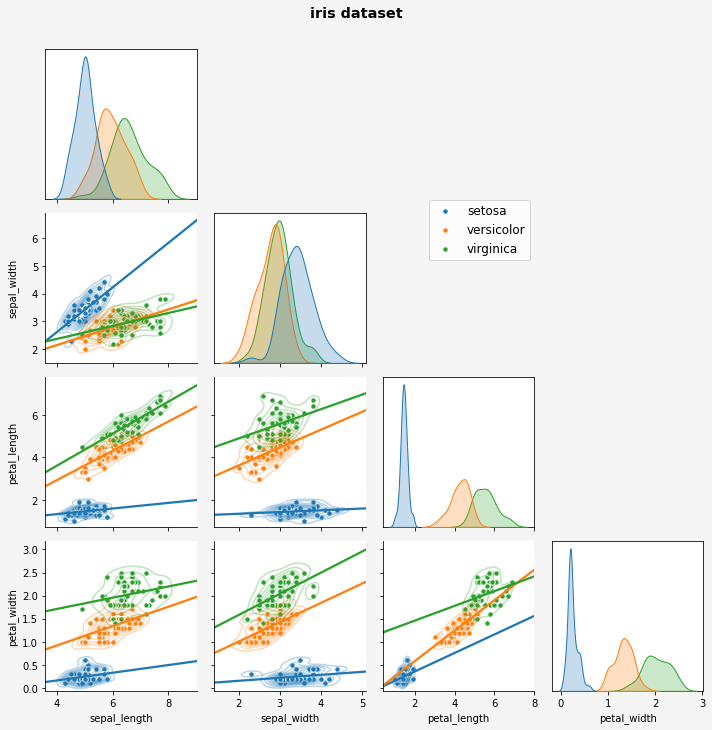

In [24]:
g = sns.PairGrid(iris, hue="species", diag_sharey=False, corner=True)

# diagonal
g.map_diag(sns.kdeplot, fill=True)
for i in range(4):
    g.axes[i][i].spines["left"].set_visible(True)
    g.axes[i][i].spines["top"].set_visible(True)
    g.axes[i][i].spines["right"].set_visible(True)
    
# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)



handles = g._legend_data.values()
labels = g._legend_data.keys()



g.fig.align_ylabels(g.axes[:,0])

g.fig.legend(handles=handles, labels=labels,
             bbox_to_anchor=(0.75, 0.75), # 범례박스 위치
             fontsize="large")

g.fig.suptitle("iris dataset", y=1.01,     # 배경 제목
               weight="bold", fontsize="x-large"
              )
g.fig.tight_layout()

g.fig.set_facecolor("whitesmoke") # 배경색

### **4.3.3 최종**

+ x,ylabel까지 정리하면 이렇습니다.

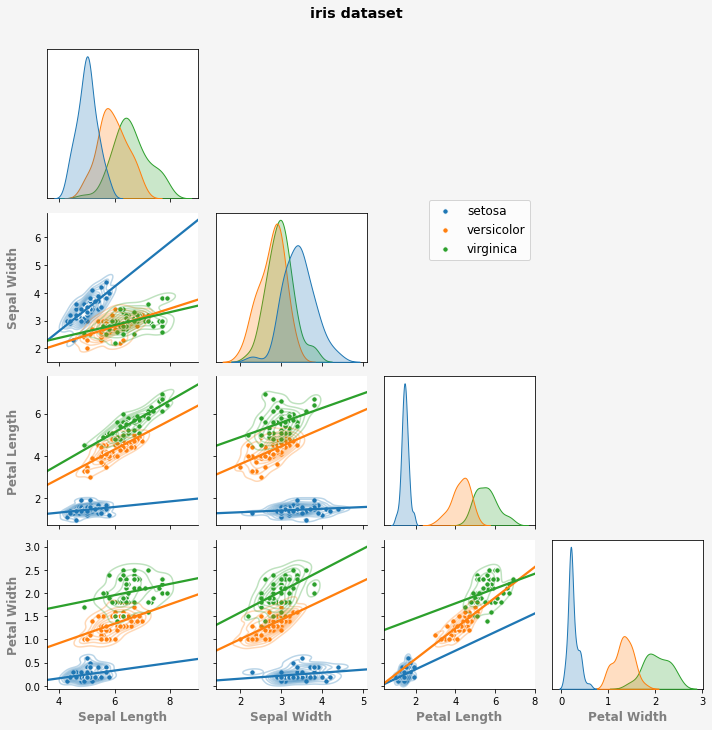

In [25]:
g = sns.PairGrid(iris, hue="species", diag_sharey=False, corner=True)

# diagonal
g.map_diag(sns.kdeplot, fill=True)
for i in range(4):
    g.axes[i][i].spines["left"].set_visible(True)
    g.axes[i][i].spines["top"].set_visible(True)
    g.axes[i][i].spines["right"].set_visible(True)
    
# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)

# legend
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels,
             bbox_to_anchor=(0.75, 0.75),
             fontsize="large")

# x, y labels
labels = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
font_labels = {"fontsize":"large", "color":"gray", "fontweight":"bold"}
for i in range(4):
    g.axes[3, i].set_xlabel(labels[i], fontdict=font_labels)
    g.axes[i, 0].set_ylabel(labels[i], fontdict=font_labels)

# ylabel alignment
g.fig.align_ylabels(g.axes[:,0])

# suptitle
g.fig.suptitle("iris dataset", y=1.01,
               weight="bold", fontsize="x-large"
              )
g.fig.tight_layout()

# facecolor
g.fig.set_facecolor("whitesmoke")

## **5. 결론**

+ 네 편의 글에 걸쳐 matplotlib + seaborn 연계기를 정리했습니다.
    + 개별적인 코드와 기술보다는 **본질**에 집중합시다.
    + **figure**와 **axes**를 통하면 **웬만한건 다 된다**는 겁니다.

+ 0.11에서 seaborn의 공식문서가 대폭 정리됐습니다.
    + 하지만 아직 부족한 점이 많습니다.
    + 특히 많은 경우 matplotlib에 숙달되었다고 전체합니다.
    + **일단 matplotlib**부터 제대로 익혀봅시다.